### 1.Introduction/Business Case

##### Alexa is a virtual assistant that is served by Amazon.In this project , We will find whether feedback is positive or not based on our dataset.Our dataset consists of 5 columns.

### Dataset

**rating** = ratings from customers

**date** = the date reviews made from customers

**variation** = variant of alexa

**verified_reviews** = reviews from customers

**feedback** = 1 is positive, 0 is negative

### 2.Importıng Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
pd.set_option('display.max_colwidth', None)

### Reading Dataset

In [2]:
reviews_df = pd.read_csv("amazon_alexa.tsv",sep="\t")

### 3.Understanding the Dataset

In [3]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


### 4.Exploring Dataset

In [6]:
reviews_df.isnull().sum() # sounds good we don't have any mising values

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283C3036EE0>,
      dtype=object)

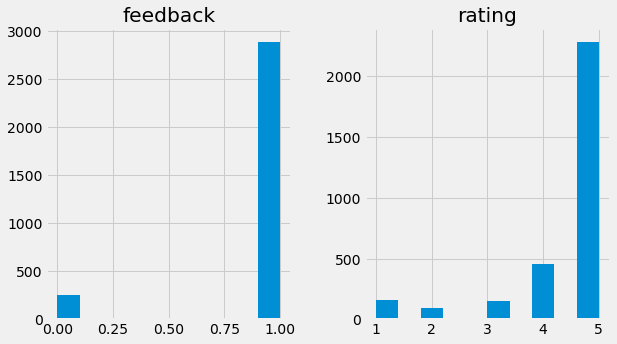

In [7]:
reviews_df.hist(figsize = (9,5))

- **Insight**

- As Our histogram, We can infer that most of the customers are happy with the product.
- They give mostly 4-5 star rating, and positive feedback

#### Adding New Column Called Len

In [8]:
reviews_df["length"] = reviews_df["verified_reviews"].apply(len)

In [9]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,195
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


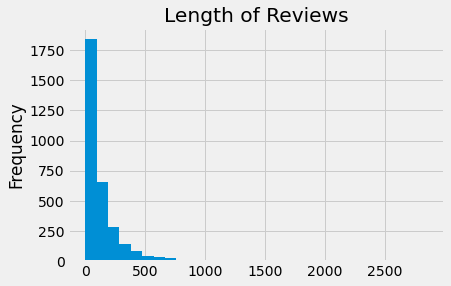

In [10]:
reviews_df["length"].plot(kind = "hist",bins=30)
plt.title("Length of Reviews")
plt.show()

#### Let's see the longest reviews

In [11]:
reviews_df[reviews_df["length"]==reviews_df["length"].max()]["verified_reviews"]

2016    Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a f

#### Let's see the shortest reviews

In [12]:
reviews_df[reviews_df["length"]==reviews_df["length"].min()]["verified_reviews"]

60      😍
85       
183      
219      
374      
       ..
3114     
3120     
3123     
3126     
3141     
Name: verified_reviews, Length: 81, dtype: object

### Separating Our Dataset by feedback

In [13]:
positive = reviews_df[reviews_df["feedback"]==1].reset_index()

In [14]:
negative = reviews_df[reviews_df["feedback"]==0].reset_index()

In [15]:
positive.head()

,index,rating,date,variation,verified_reviews,feedback,length
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,195
3,3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,172
4,4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [16]:
negative.head()

,index,rating,date,variation,verified_reviews,feedback,length
0,46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more accurately then Alexa. I don't see a real need for it in my household, though it was a good bargain on prime day deals.",0,163
1,111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get a bose,0,53
2,141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
3,162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",0,87
4,176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


### Creating Countplot

Text(0.5, 1.0, 'Total Number of Feedback')

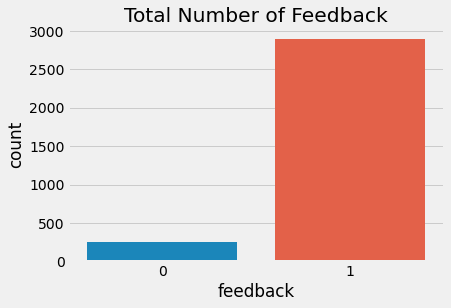

In [17]:
sns.countplot(reviews_df["feedback"],label="count")
plt.title("Total Number of Feedback")

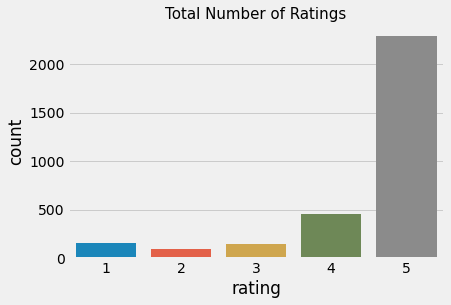

In [18]:
sns.countplot(reviews_df["rating"])
plt.title("Total Number of Ratings",fontsize=15)
plt.show()

### Rating vs Variation

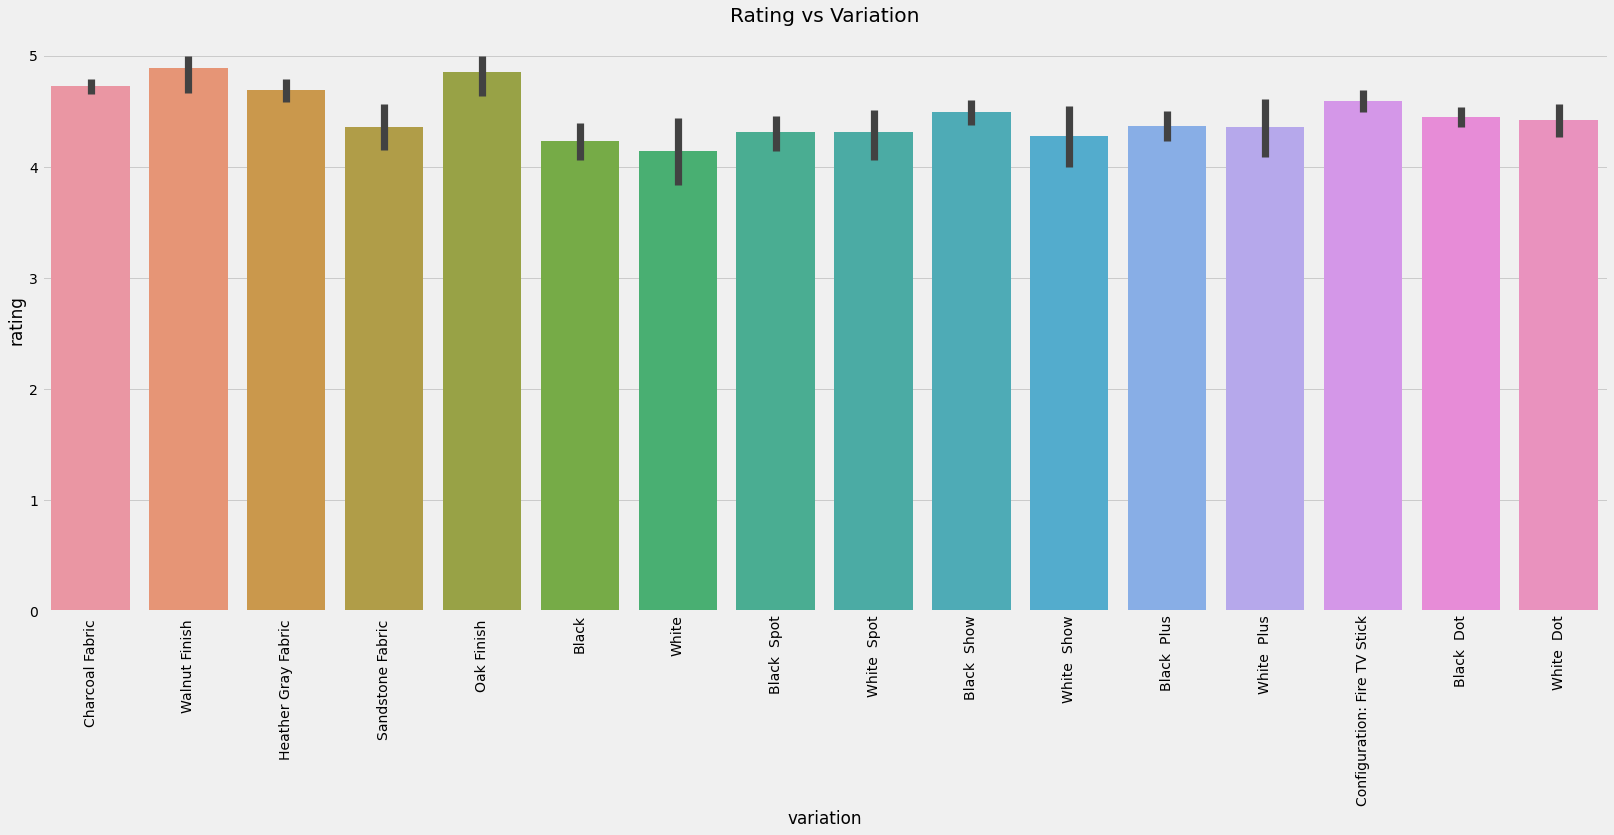

In [19]:
plt.figure(figsize=(25,10))
sns.barplot(x="variation",y="rating",data=reviews_df)
plt.xticks(rotation=90)
plt.title("Rating vs Variation")
plt.show()

#### Let's see most used words by using worldcloud

In [20]:
sentences = reviews_df["verified_reviews"].tolist()
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [24]:
sentences_as_one_string = " ".join(sentences)

In [25]:
from wordcloud import WordCloud

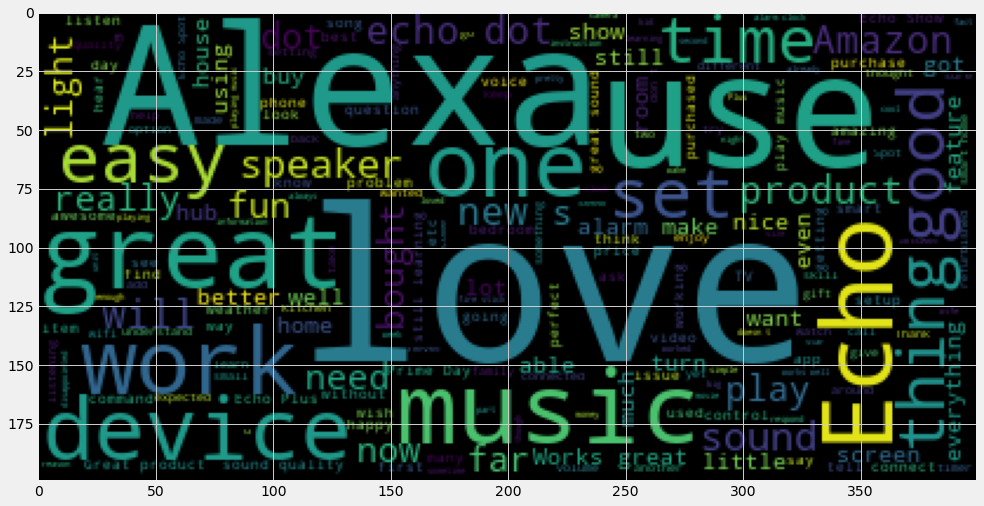

In [26]:
plt.figure(figsize =(15,10))
plt.imshow(WordCloud().generate(sentences_as_one_string))

### Let's create a worldcloud for bad reviews

In [27]:
negative_sentences = negative["verified_reviews"].tolist()
negative_sentences_as_string = " ".join(negative_sentences)

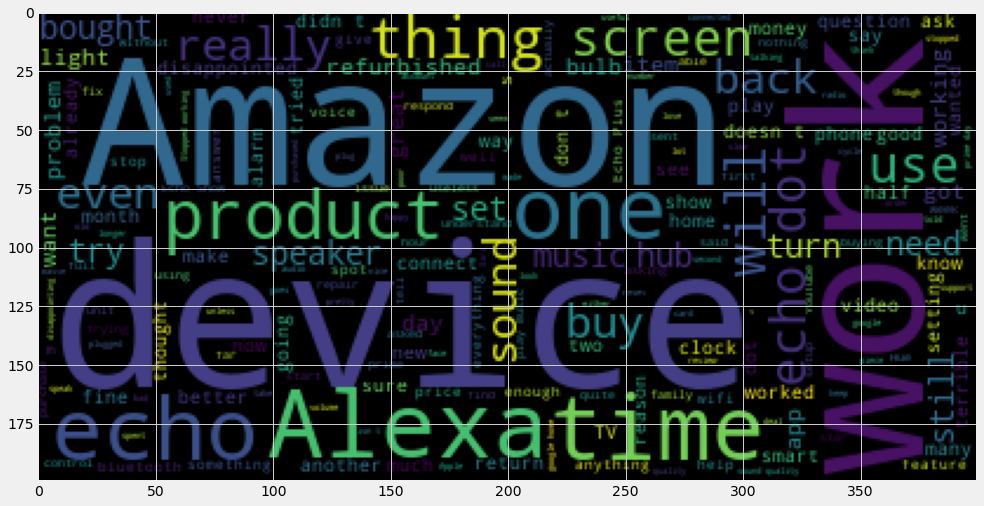

In [28]:
plt.figure(figsize =(15,10))
plt.imshow(WordCloud().generate(negative_sentences_as_string))

### Same for positive reviews

In [29]:
positive_sentences = positive["verified_reviews"].tolist()
positive_sentences_as_string = " ".join(positive_sentences)

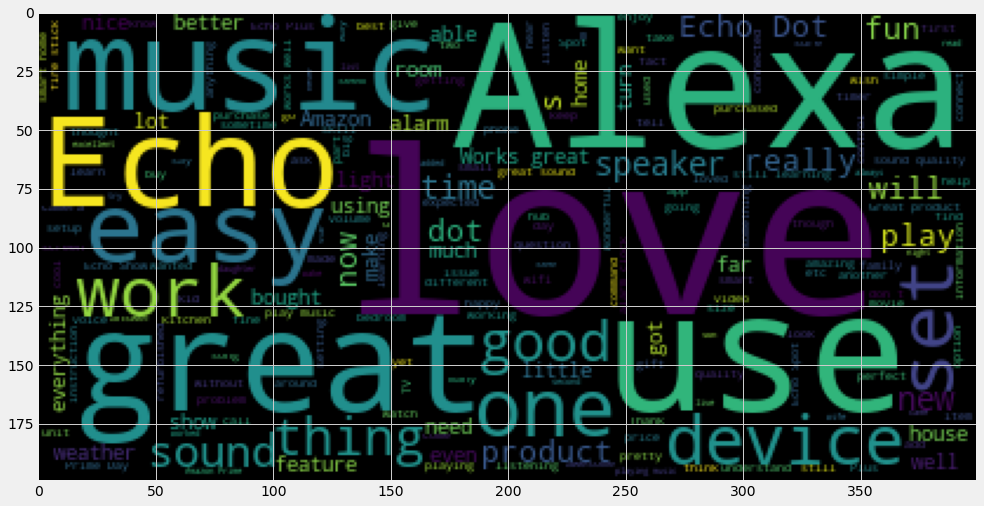

In [30]:
plt.figure(figsize =(15,10))
plt.imshow(WordCloud().generate(positive_sentences_as_string))

### Dropping Unnecessary Columns

In [31]:
reviews_df = reviews_df.drop(["date","rating","length"],axis=1)

#### Converting Variation to Dummy Variable

In [32]:
variation_dummy = pd.get_dummies(reviews_df["variation"],drop_first=True)

In [33]:
variation_dummy

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
reviews_df.drop(["variation"],axis = 1,inplace=True) # dropping variation column

In [35]:
reviews_df = pd.concat([reviews_df,variation_dummy],axis=1)

In [36]:
reviews_df.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Punctuation

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Stopwords

In [39]:
import nltk

In [42]:
from nltk.corpus import stopwords
stopwords.words("english")[:5]

['i', 'me', 'my', 'myself', 'we']

### Count Vectorization

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
vectorizer = CountVectorizer()

### Text Cleaning

In [47]:
def message_cleaning(message): ## creating function for cleaning punctuation and stopwords
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = "".join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words("english") ]
    return Test_punc_removed_join_clean

In [48]:
reviews_df_clean = reviews_df["verified_reviews"].apply(message_cleaning)  ## applying function to our dataframe

In [49]:
print(reviews_df_clean[3]) # checking cleaned text

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [50]:
from sklearn.feature_extraction.text import CountVectorizer   ## importing CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)

In [51]:
reviews_countvectorizer = vectorizer.fit_transform(reviews_df["verified_reviews"])

In [53]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [54]:
reviews_countvectorizer.shape

(3150, 5211)

In [55]:
reviews_df.shape

(3150, 17)

In [56]:
reviews_df.drop(["verified_reviews"],axis =1,inplace = True) ## deleting old column

In [57]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())  ### creating column for vectorized text

### Concatenating Dataframe

In [64]:
reviews_df = pd.concat([reviews,reviews_df],axis=1)
reviews_df.head()

,0,1,2,3,4,5,6,7,8,9,...,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting DataFrame

In [65]:
X =reviews_df.drop("feedback",axis=1)
y =reviews_df["feedback"]

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Naive Bayes 

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
MB_Classifier = MultinomialNB()
MB_Classifier.fit(X_train,y_train)

MultinomialNB()

In [70]:
y_predict= MB_Classifier.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix,classification_report ### importing our metrics

In [72]:
cm = confusion_matrix(y_test,y_predict)

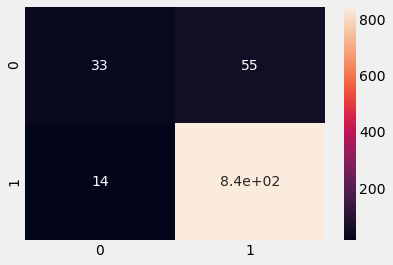

In [73]:
sns.heatmap(cm,annot=True)

In [74]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.38      0.49        88
           1       0.94      0.98      0.96       857

    accuracy                           0.93       945
   macro avg       0.82      0.68      0.72       945
weighted avg       0.92      0.93      0.92       945



### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
linear_model = LogisticRegression()

In [77]:
linear_model.fit(X_train,y_train)

LogisticRegression()

In [78]:
linear_pred = linear_model.predict(X_test)

In [79]:
cm2 = confusion_matrix(y_test,linear_pred)

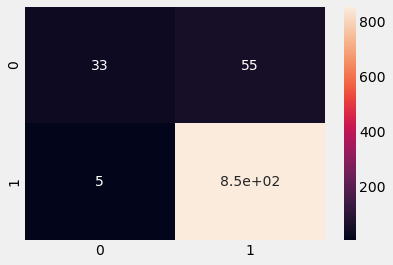

In [80]:
sns.heatmap(cm2,annot=True)

In [81]:
print(classification_report(y_test,linear_pred))

              precision    recall  f1-score   support

           0       0.87      0.38      0.52        88
           1       0.94      0.99      0.97       857

    accuracy                           0.94       945
   macro avg       0.90      0.68      0.74       945
weighted avg       0.93      0.94      0.92       945



### Conclusion 

- As a summary, We conducted our analysis by cleaning,analyzing,vectorizing our words and modeling the encoded dataset.
- There are two models choosen in this project and  Logistic Regression performed slightly better than NaiveBayes algorithm.